In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
data = pd.read_csv('82210-1.csv', sep=',', index_col=0)

data.head()

,Y,M,D,T,TM,Tm,SLP,STP,H,PP,VV,V,VM,VG,FG,RA,SN,GR,TS,TR
0,1991,1,1,"5,3","9,6",0,-,-,86,0,"3,4","2,4",13,-,1,0,0,0,0,0
1,1991,1,2,"2,6","6,4",0,-,-,88,0,"3,7","4,1","11,1",-,1,0,0,0,0,0
2,1991,1,3,"2,3","5,2",-1,-,-,87,0,"2,6",2,"9,4",-,1,0,0,0,0,0
3,1991,1,4,"3,9",10,0,-,-,63,0,8,"4,4","25,9",-,1,0,0,0,0,0
4,1991,1,5,"2,9","10,4",-3,-,-,69,0,"10,5","5,2","18,3",-,0,0,0,0,0,0


In [103]:
data.drop(['VM', 'VG'], axis=1, inplace=True)

In [104]:
data.rename(columns={"Y": "Year", "M": "Month", "D": "Day", "T":"Temperature", "TM":"Maximum_Temperature", "Tm":"Minimum_Temperature", "SLP":"Atmospheric_pressure_sea_level", "STP":"Atmospheric_pressure_station_level", "H": "Humidity", "PP":"Rainfall", "VV":"Visibility", "V":"Wind", "FG":"Fog", "RA":"Rain", "SN":"Snow", "GR":"Hail", "TS":"Thunder", "TR":"Tornado"}, inplace=True)


In [105]:
data.replace('-', 'NaN', inplace=True)


In [110]:
for col in data.columns:
    if data[col].dtype == "O":
        data[col] = data[col].str.replace(',','.')
        
data.head()

,Year,Month,Day,Temperature,Maximum_Temperature,Minimum_Temperature,Atmospheric_pressure_sea_level,Atmospheric_pressure_station_level,Humidity,Rainfall,Visibility,Wind,Fog,Rain,Snow,Hail,Thunder,Tornado
0,1991,1,1,5.3,9.6,0,NaN,NaN,86,0,3.4,2.4,1,0,0,0,0,0
1,1991,1,2,2.6,6.4,0,NaN,NaN,88,0,3.7,4.1,1,0,0,0,0,0
2,1991,1,3,2.3,5.2,-1,NaN,NaN,87,0,2.6,2,1,0,0,0,0,0
3,1991,1,4,3.9,10,0,NaN,NaN,63,0,8,4.4,1,0,0,0,0,0
4,1991,1,5,2.9,10.4,-3,NaN,NaN,69,0,10.5,5.2,0,0,0,0,0,0


In [118]:
data['Temperature'] = data['Temperature'].astype(float)
data['Maximum_Temperature'] = data['Maximum_Temperature'].astype(float)
data['Minimum_Temperature'] = data['Minimum_Temperature'].astype(float)
data['Atmospheric_pressure_sea_level'] = data['Atmospheric_pressure_sea_level'].astype(float)
data['Atmospheric_pressure_station_level'] = data['Atmospheric_pressure_station_level'].astype(float)
data['Humidity'] = data['Humidity'].astype(float)
data['Rainfall'] = data['Rainfall'].astype(float)
data['Visibility'] = data['Visibility'].astype(float)
data['Wind'] = data['Wind'].astype(float)

data.dtypes

Year                                    int64
Month                                   int64
Day                                     int64
Temperature                           float64
Maximum_Temperature                   float64
Minimum_Temperature                   float64
Atmospheric_pressure_sea_level        float64
Atmospheric_pressure_station_level    float64
Humidity                              float64
Rainfall                              float64
Visibility                            float64
Wind                                  float64
Fog                                     int64
Rain                                    int64
Snow                                    int64
Hail                                    int64
Thunder                                 int64
Tornado                                 int64
dtype: object

Text(0, 0.5, 'Temperature')

<Figure size 864x576 with 0 Axes>

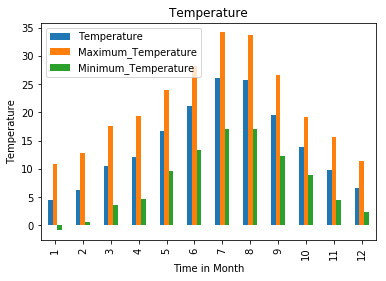

In [130]:
#Bar plot graph

temp = data[['Temperature', 'Maximum_Temperature', 'Minimum_Temperature']].groupby(data.Month).mean()

plt.figure(figsize=(12, 8))
ax = temp.plot(kind='bar')
ax.set_title('Temperature')
ax.set_xlabel('Time in Month')
ax.set_ylabel('Temperature')

'''on peux observer l"evolution des moyennes des température min et max au cours des mois. Les températures sont plus élevé en été et plus faible en hiver'''

-0.7173194436141496

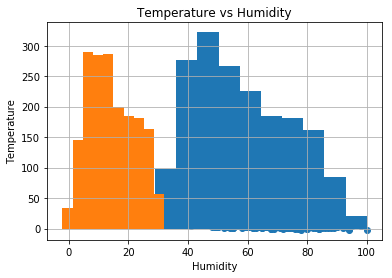

In [150]:
#scatter plot
x=data['Humidity']
y=data['Temperature']
plt.scatter(x,y)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Temperature vs Humidity')

#on peux voir une relation entre la température de l'humidité

data['Humidity'].hist()
data['Temperature'].hist()

#les variables semblent suivre une loi normale, je peux donc calculer le coef de correlation selon pearson

data['Humidity'].corr(data['Temperature'], method = "pearson")

#r=-0,71, la correlation est plutôt élevée et négative


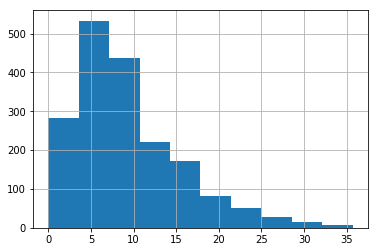

In [136]:
#histogram, distribution de la variable
data['Wind'].hist()

#la distribution de la variable vent semble suivre une loi normale

Text(0.5, 1.0, 'Humidity over month')

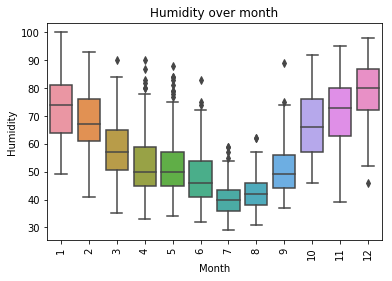

In [144]:
#boxplot

ax = sns.boxplot(x="Month", y="Humidity", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Humidity over month')

#on peux suivre l'ensemble des stats de l'humidité au cours du temps. l'humidité varie selon les mois de l'année